<div style="text-align: center; font-family: Arial, sans-serif; margin-top: 50px;">
<h1 style="font-size: 36px; font-weight: bold; color: #4CAF50;">Mini-projet 3 - Méthode de la Matrice 1D</h1>
<h2 style="font-size: 20px; font-weight: bold; color: #4CAF50;">PHS3903</h2>
<h2 style="font-size: 20px; margin-bottom: 20px;">[Harbec/William, Leduc/Marc-Antoine, St-Onge/Émily]</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">[2215754, 2198586, 2134102]</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">[12 février 2025]</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">[Jérémie Villeneuve, Sean Molesky, Maksim Skorobogatiy]</h2>
</div>


# Travail préparatoire

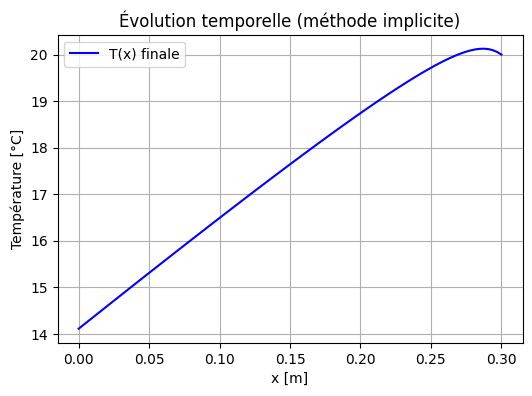

In [6]:
import numpy as np
import matplotlib.pyplot as plt

L    = 0.3        # [m] épaisseur du mur
k    = 1.0        # [W/(m·K)] conductivité thermique
h0   = 1.0        # [W/(m²·K)] coefficient de convection à x = 0 (face extérieure)
Ta   = -10.0      # [°C] température ambiante extérieure (x = 0)
Ti   = 20.0       # [°C] température imposée à l'intérieur (x = L)
rho  = 1        # [kg/m³]
Cp   = 1        # [J/(kg·K)]

q    = 2000.0     # [W/m³] amplitude de la source volumique
dL   = L/20.0    # [m] largeur caractéristique de la source

N = 101                     # nombre de nœuds
dx = L/(N-1)                # pas spatial
x = np.linspace(0, L, N)

dt = 0.1                    # pas de temps [s]
nmax = 200                  # nombre de pas de temps

# Coefficient de diffusivité et paramètre r
alpha = k/(rho*Cp)
r = alpha*dt/(dx**2)

# Calcul de Tw selon l'équation donnée
Tw = (Ti * k / L + Ta * h0) / (k / L + h0)

# Initialisation correcte de la température
Tn = Tw + (Ti - Tw) * (x / L)  # Condition initiale exacte


# --- Condition de Robin à x = 0 (face extérieure) ---
c1 = 3*k + 2*h0*dx
c2 = -4*k
c3 = k
b0 = 2*h0*dx*Ta

# --- Condition de Dirichlet à x = L (face intérieure) ---
d1 = 0
d2 = 1
d3 = 0
bN = Ti

# 
for n in range(nmax):
    A = np.zeros((N, N))
    b = np.zeros(N)

    A[0, 0] = c1
    A[0, 1] = c2
    A[0, 2] = c3
    b[0] = b0
    
    # --- Condition de Robin à x = 0 (face extérieure) ---
    # Approximons T'(0) par : (-3T0 + 4T1 - T2)/(2*dx)
    # Robin: -k*T'(0) = h0*(Ta - T0)
    # => k*(3T0 - 4T1 + T2) = 2h0*dx*(Ta - T0)
    # => (3k + 2h0*dx)*T0 - 4k*T1 + k*T2 = 2h0*dx*Ta
    A[N-1, :] = 0.0
    A[N-1, N-1] = d2
    b[N-1] = bN

    # --- Nœuds intérieurs i = 1, ..., N-2 ---
    for i in range(1, N-1):
        A[i, i-1] = -r
        A[i, i]   = 1 + 2*r
        A[i, i+1] = -r
        
        # Terme source S(x) = q / [1 + ((x-L)/dL)^2]
        S_i = q / (1.0 + ((x[i]-L)/dL)**2)
        # Le côté droit intègre la contribution du terme source et la condition temporelle
        b[i] = Tn[i] + dt*(S_i/(rho*Cp))
    
    # --- Condition de Dirichlet à x = L (face intérieure) ---
    A[N-1, :] = 0.0
    A[N-1, N-1] = 1.0
    b[N-1] = Ti

    Tnp1 = np.linalg.solve(A, b)
    Tn = Tnp1.copy()  

plt.figure(figsize=(6,4))
plt.plot(x, Tn, 'b-', label='T(x) finale')
plt.xlabel('x [m]')
plt.ylabel('Température [°C]')
plt.title("Évolution temporelle (méthode implicite)")
plt.grid(True)
plt.legend()
plt.show()


#  

## Question 1 i)

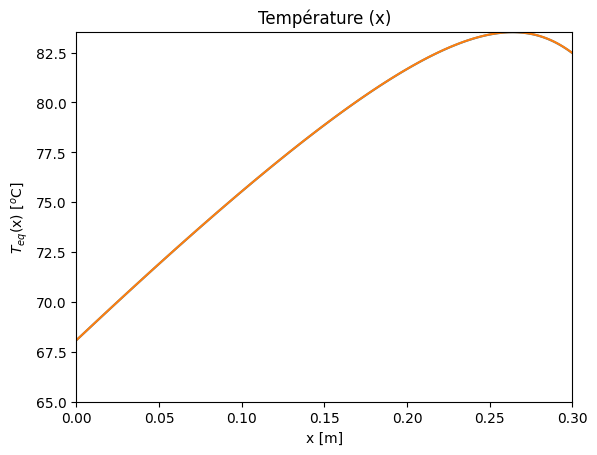

La température d'équilibre maximale est de 83.528 °C avec un incertitude absolue de 0.005 °C


In [7]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Équation différentielle: d^2 u/dx^2=g(x) sur x=(a,b)
# Conditions aux limites générales:
# x=a: c1*du/dx+c2*u+c3=0
# x=b: d1*du/dx+d2*u+d3=0

# Équation de transfert de chaleur d^2 T/dx^2=-S(x)/k sur x=(0,L)
# dans un mur d'isolation thermique
L=0.3; #[m] ; Épaisseur du mur

k=1;h=1;
# k=1;#[W/(m*K)]; La conductivité thermique de la brique
# h=1; #[W/(m^2*K)]; Coefficient de transfert thermique pour l'interface plane entre l'air et solide.

# Condition convective (de Robin) à x=0 (face externe du mur): -k*dT/dx=h(Ta-T)
Ta=-10; #[oC]
c1=-k; c2=h; c3=-h*Ta;
# Condition de Neumann à x=L (face interne du mur): dT/dx=0 - flux net de chaleur est 0
Ti = 20
d1=k; d2=h; d3=-h*Ti;

#(N+1) nœuds dans la maille
# Nmax=10000 pour 1G de mémoire

Nar1=np.array([100]); #dx=3mm

Nar=np.zeros(2*Nar1.size,dtype=Nar1.dtype);
Nar[np.arange(0,2*Nar1.size-1,2)]=Nar1.copy();
Nar[np.arange(0,2*Nar1.size-1,2)+1]=2*Nar1.copy();

ci=-1;
Err=np.zeros(Nar1.size,dtype=np.double);
tInv=np.zeros(Nar.size,dtype=np.double);
Tmax=np.zeros(Nar.size,dtype=np.double);

plt.figure(1)
for N in Nar:
    S=np.zeros(N+1,dtype=np.double);
    A=np.zeros((N+1,N+1),dtype=np.double);
    b=np.zeros(N+1,dtype=np.double);
    u=np.zeros(N+1,dtype=np.double);
    
    ci=ci+1;
    dx=L/N; #Pas de discrétisation
    x=np.linspace(0,L,N+1);
    
    # Sourse volumique de chaleur q[W/m^3] d'épaisseur dL
    # La source est intégrée dans la partie intérieure du mur
    dL=0.05; 
    q=2000; # W/m^3;
    S=q/(1+((x-L)/dL)**2)
    
    # matrice pleine
    A=np.diag(-2*np.ones(N+1),0)+np.diag(np.ones(N),-1)+np.diag(np.ones(N),1);
    
    A[0,0]=2*c2*dx-3*c1;A[0,1]=4*c1;A[0,2]=-c1;
    A[N,N]=3*d1+2*d2*dx;A[N,N-1]=-4*d1;A[N,N-2]=d1;
    b=-S/k*dx**2; b[0]=-2*c3*dx; b[N]=-2*d3*dx;
    
    tic=time.time_ns();
    u=np.linalg.solve(A, b); # Option préférée
    toc=time.time_ns();
    tInv[ci]=(toc-tic)/1e9; #temps en [s]   
    Tmax[ci]=u.max();
    plt.plot(x,u);
    T_eq_max = u.max();
    Err=np.abs(Tmax[np.arange(0,Tmax.size,2)]-Tmax[np.arange(1,Tmax.size,2)]);

erreur = Err[0]

plt.axis([x[0], x[-1], 65, Tmax.max()])
plt.title('Température (x)')
plt.xlabel('x [m]')    
plt.ylabel('$T_{eq}$(x) [$^o$C]')
plt.show()

print(f"La température d'équilibre maximale est de {T_eq_max:.3f} \u00B0C avec un incertitude absolue de {erreur:.3f} \u00B0C")


## Question 2 ii)

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, csc_matrix
from scipy.sparse.linalg import spsolve

L    = 0.3        # [m] épaisseur du mur
k    = 1.0        # [W/(m·K)] conductivité thermique
h0   = 1.0        # [W/(m²·K)] coefficient de convection à x = 0 (face extérieure)
Ta   = -10.0      # [°C] température ambiante extérieure (x = 0)
Ti   = 20.0       # [°C] température imposée à l'intérieur (x = L)
rho  = 2000        # [kg/m³]
Cv   = 1000        # [J/(kg·K)]

q    = 2000.0     # [W/m³] amplitude de la source volumique
dL   = L/20.0    # [m] largeur caractéristique de la source

N = 101                     # nombre de nœuds
dx = 0.003                  # pas spatial (m)
x = np.linspace(0, L, N)

alpha = k / (rho * Cv)
dt = 1 * dx**2/ alpha                    # pas de temps [s]
nmax = 200                  # nombre de pas de temps

# Coefficient de diffusivité et paramètre r
r = alpha*dt/(dx**2)

# Calcul de Tw selon l'équation donnée
Tw = (Ti * k / L + Ta * h0) / (k / L + h0)

# Initialisation correcte de la température
Tn = Tw + (Ti - Tw) * (x / L)  # Condition initiale exacte


# --- Condition de Robin à x = 0 (face extérieure) ---
c1 = 3*k + 2*h0*dx
c2 = -4*k
c3 = k
b0 = 2*h0*dx*Ta

# --- Condition de Dirichlet à x = L (face intérieure) ---
d1 = 0
d2 = 1
d3 = 0
bN = Ti

t = np.arange(0, 1e6, dt)

# 
for n in range(nmax):
    A = np.zeros((N, N))
    b = np.zeros(N)

    A[0, 0] = c1
    A[0, 1] = c2
    A[0, 2] = c3
    b[0] = b0
    
    # --- Condition de Robin à x = 0 (face extérieure) ---
    # Approximons T'(0) par : (-3T0 + 4T1 - T2)/(2*dx)
    # Robin: -k*T'(0) = h0*(Ta - T0)
    # => k*(3T0 - 4T1 + T2) = 2h0*dx*(Ta - T0)
    # => (3k + 2h0*dx)*T0 - 4k*T1 + k*T2 = 2h0*dx*Ta
    A[N-1, :] = 0.0
    A[N-1, N-1] = d2
    b[N-1] = bN

    # --- Nœuds intérieurs i = 1, ..., N-2 ---
    for i in range(1, N-1):
        A[i, i-1] = -r
        A[i, i]   = 1 + 2*r
        A[i, i+1] = -r
        
        # Terme source S(x) = q / [1 + ((x-L)/dL)^2]
        S_i = q / (1.0 + ((x[i]-L)/dL)**2)
        # Le côté droit intègre la contribution du terme source et la condition temporelle
        b[i] = Tn[i] + dt*(S_i/(rho*Cv))
    
    # --- Condition de Dirichlet à x = L (face intérieure) ---
    A[N-1, :] = 0.0
    A[N-1, N-1] = 1.0
    b[N-1] = Ti

    Tnp1 = np.linalg.solve(A, b)
    Tn = Tnp1.copy()

T_eq_max = np.max(Tnp1)
# Méthode implicite pour le régime transitoire
dt = 1 * dx**2 / alpha  # Réduction de dt pour assurer la stabilité
time_elapsed = 0
tolerance = 0.05# * np.abs(Tnp1 - Ta)
T = Tnp1.copy()  # Initialiser avec la solution stationnaire
B = (np.identity(N) - alpha * dt * A)


# Stockage des valeurs pour le tracé
time_values = []
T_max_values = []

# Boucle temporelle
for i in range(len(Tnp1)):
    T = np.linalg.solve(B, T + ((dt * S_i) / (rho * Cv)))
    time_elapsed += dt
    time_values.append(time_elapsed)
    T_max_values.append(np.max(T))
    
    if len(time_values) > 100000:  # Sécurité pour éviter une boucle infinie
        print("Erreur : la boucle semble ne jamais converger.")
        break

    T_nouvelle = T.copy()

T_max = T_nouvelle.max()

T_diff = []
for i in range(len(T_nouvelle)):
    T_diff.append(np.abs(T_nouvelle[i] - T_max))

print(f"Température maximale à l'équilibre: {T_max:.2f} °C")
print(f"Temps d'équilibrage du système: {time_elapsed:.2f} s")